# Перетворення Фур'є

У даній лабораторній роботі розглянуто наступні приклади перетворень Фур'є:
1. Перетворення Фур'є у Numpy
        1.1. Фільтр високих частот 
2. Перетворення Фур'є в OpenCV
        2.1. Фільтр низьких частот
3. Зниження роздільної здатності за допомогою Гауссового фільтра
4. Підвищення роздільної здатності зображення за допомогою ДПФ
5. Відновлення розмитого зображення за допомогою ДПФ

### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.fftpack as fp
from scipy import signal
import sys

<h3>Pad with zeros function define</h3>

In [2]:
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

### 1. Перетворення Фур'є у Numpy

Numpy має пакет FFT для знаходження швидкого перетворення Фур'є. **np.fft.fft2()** забезпечує перетворення частоти, яке буде складним масивом. Перший її аргумент - це вхідне зображення, у відтінках сірого. Другий аргумент необов'язковий, який визначає розмір вихідного масиву. Якщо він перевищує розмір вхідного зображення, вхідне зображення заповнюється нулями перед обчисленням FFT. Якщо воно менше, ніж вхідне зображення, вхідне зображення буде обрізане. Якщо жодних аргументів не передано, розмір вихідного масиву буде таким самим, як і вхідний.

Після отримання результату, компонент нульової частоти  буде у верхньому лівому куті. Якщо його необхідно довести до центру, потрібно перенести результат на N/2 в обох напрямках. Це робиться функцією, **np.fft.fftshift()**.

### Зчитаємо вихідне зображення:

In [3]:
img_ref = cv2.imread("/content/shrek.jpg",0)
img = cv2.imread("/content/troll.jpg",0)

## Швидке перетворення Фур'є (ШПФ)

### Синтаксис функції
    numpy.fft.fft2(a, s=None, axes=(-2, -1), norm=None)
Параметри:
* **a** - вхідне зображення (масив);
* **s** - розмір вхідного масиву;
* **norm** -  режим нормалізації.

### Синтаксис функції
    numpy.fft.fftshift(x, axes=None)
Параметри:
* **x** - вхідне зображення (масив);
* **axes** - ось зсуву.

In [4]:
f_ref = np.fft.fft2(img_ref)
fshift_ref = np.fft.fftshift(f_ref)
magnitude_spectrum_ref = 20*np.log(np.abs(fshift_ref))

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

### Вихідне зображення та його спектр

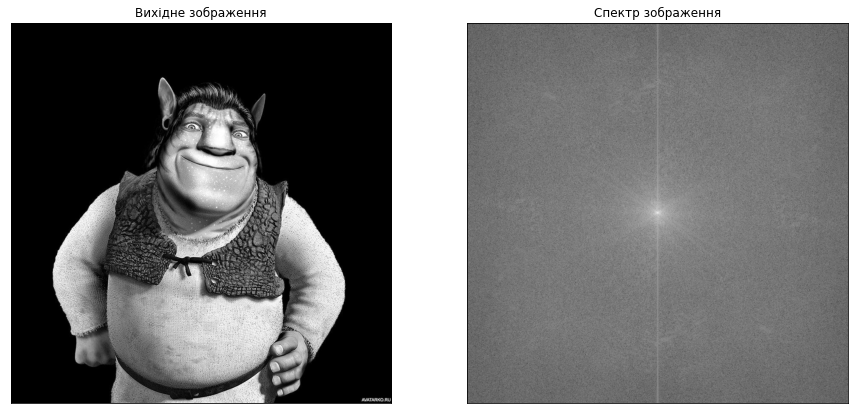

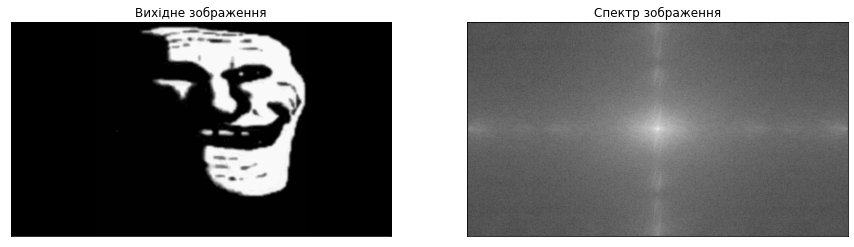

In [5]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_ref, cmap = 'gray')
plt.title('Спектр зображення'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Спектр зображення'), plt.xticks([]), plt.yticks([])
plt.show()

Можна побачити більше білого регіону в центрі, де низьих частот більше.

Отже, знайдене частотне перетворення. Тепер можна можна робити деякі операції в частотній області, наприклад, фільтрування високої частоти та реконструкцію зображення, тобто пошук зворотного ШПФ.

### 1.1. Фільтр високих частот в частотній області

Для реалізаціії фільтру виских частот видаляють низькі частоти, маскуючи прямокутне вікно розміром 60x60. Потім застосовують зворотний зсув, використовуючи **np.fft.ifftshift()**, щоб постійна складова (нульова частота) знову потрапила у верхній лівий кут. Потім знаходяьть обернене ШПФ за допомогою функції **np.ifft2()**.

In [6]:
rows_ref, cols_ref = img_ref.shape
crow_ref, ccol_ref = rows_ref/2 , cols_ref/2
fshift_ref[int(crow_ref-30):int(crow_ref+30), int(ccol_ref-30):int(ccol_ref+30)] = 0
f_ishift_ref = np.fft.ifftshift(fshift_ref)
img_back_ref = np.fft.ifft2(f_ishift_ref)
img_back_ref = np.abs(img_back_ref)

rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

### Вихідне зображення та зображення після фільтру високої частоти

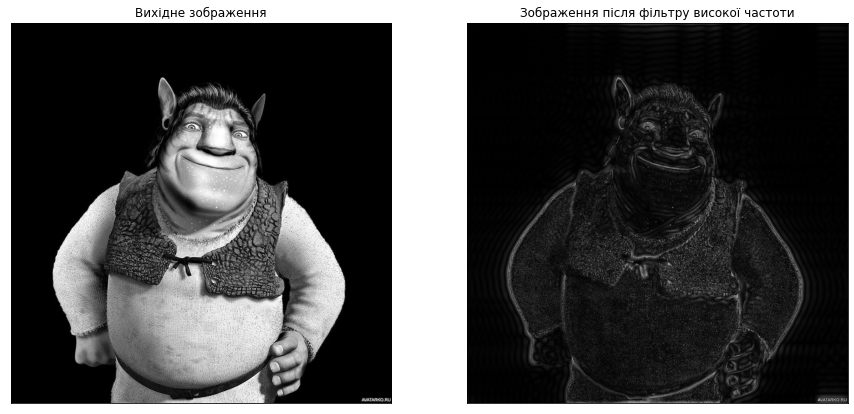

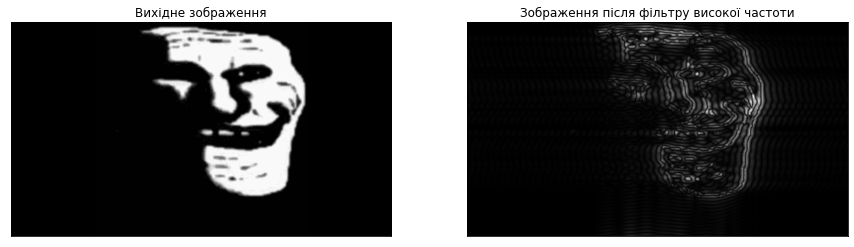

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back_ref, cmap = 'gray')
plt.title('Зображення після фільтру високої частоти'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Зображення після фільтру високої частоти'), plt.xticks([]), plt.yticks([])
plt.show()

### Перетворення Фур'є в OpenCV

OpenCV надає для цього функції **cv2.dft()** і **cv2.idft()**. Вона повертає той самий результат, що і попередній метод, але з двома каналами. Перший канал матиме реальну частину результату, а другий канал матиме уявну частину результату. Вхідне зображення спочатку слід перетворити на np.float32.

### Синтаксис функції
    cv2.dft(src, dst, flags, nonzeroRows=0)
Параметри:
* **src** - вхідне зображення у форматі float32;
* **s** - вихідний масив, розмір і тип якого залежить від **flags**;
* **flags** -  прапори трансформації, що представляють собою комбінацію наступних значень:
    * **DFT_INVERSE** виконує зворотне 1D або 2D перетворення замість перетворення за замовчуванням.
    * DFT_SCALE масштабує результат: ділить його на кількість елементів масиву. Зазвичай він поєднується з DFT_INVERSE.
    * **DFT_ROWS** виконує пряме або зворотне перетворення кожного окремого рядка вхідної матриці.
    * **DFT_COMPLEX_OUTPUT** виконує пряму трансформацію 1D або 2D реального масиву.
    * **DFT_REAL_OUTPUT** виконує зворотне перетворення 1D або 2D складного масиву.
* **nonzeroRows** - коли параметр не дорівнює нулю, функція передбачає, що лише перші рядки nonroroRows вхідного масиву або лише перші ненульові ряди вихідного масиву містять не нулі, таким чином, функція може ефективніше обробляти решту рядків і економити час.

In [8]:
dft_ref = cv2.dft(np.float32(img_ref),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_ref = np.fft.fftshift(dft_ref)
magnitude_spectrum_ref = 20*np.log(cv2.magnitude(dft_shift_ref[:,:,0],dft_shift_ref[:,:,1]))

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

### Вихідне зображення та його спектр

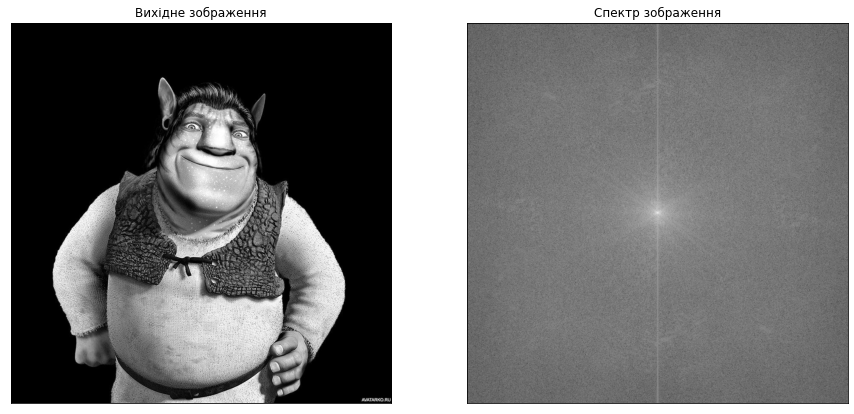

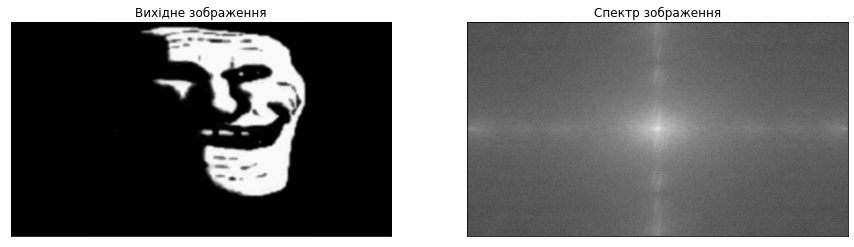

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_ref, cmap = 'gray')
plt.title('Спектр зображення'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Спектр зображення'), plt.xticks([]), plt.yticks([])
plt.show()

Отже, тепер потрібно зробити зворотнє ШПФ. Вище було створено фільтр високих частот (HPF), на цей раз ми побачимо, як видалити вміст з високою частотою на зображенні, тобто застосуємо фільтр низьких частот (LPF) до зображення. Він розмиває зображення. Для цього створюється маска спочатку з високим значенням (1) на низьких частотах, тобто передається вміст низьких частот і 0 в область високих частот.

In [10]:
rows_ref, cols_ref = img_ref.shape
crow_ref, ccol_ref = rows_ref/2 , cols_ref/2

rows, cols = img.shape
crow,ccol = rows/2 , cols/2

### Створюємо маску з 1 в центрі

In [11]:
mask_ref = np.zeros((rows_ref,cols_ref,2),np.uint8)
mask_ref[int(crow_ref - 30):int(crow_ref + 30), int(ccol_ref - 30):int(ccol_ref + 30)] = 1

mask = np.zeros((rows, cols,2),np.uint8)
mask[int(crow - 30):int(crow + 30), int(ccol - 30):int(ccol + 30)] = 1

### Застосування зворотнього ШПФ

In [12]:
fshift_ref = dft_shift_ref * mask_ref
f_ishift_ref = np.fft.ifftshift(fshift_ref)
img_back_ref = cv2.idft(f_ishift_ref)
img_back_ref = cv2.magnitude(img_back_ref[:,:,0],img_back_ref[:,:,1])

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

### Вихідне зображення та заображення після фільтру низької частоти

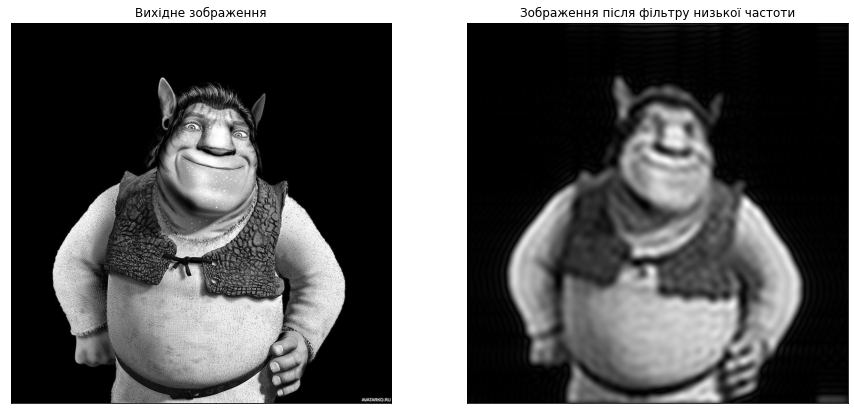

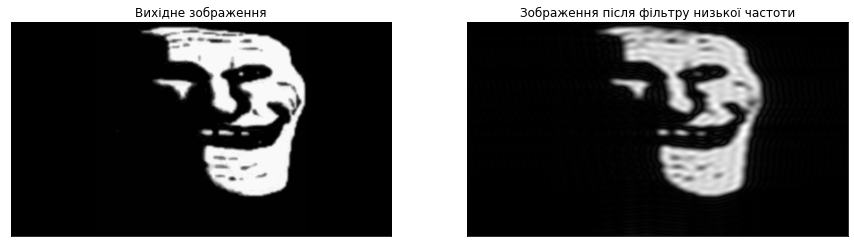

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back_ref, cmap = 'gray')
plt.title('Зображення після фільтру низької частоти'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Вихідне зображення'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Зображення після фільтру низької частоти'), plt.xticks([]), plt.yticks([])
plt.show()

### Зниження роздільної здатності за допомогою Гауссового фільтра

1. Зменшимо розмір зображення в 16 разів, зменшивши висоту і ширину в 4 рази.
2. Оберемо кожен 4-й піксель у напрямку x та y вихідного зображення, щоб обчислити значення пікселів на меншому зображенні.
3. Перед початком відбору проб застосуємо фільтр Гаусса (щоб згладити зображення).
4. Порівняємо якість вихідного зображення, отриманого шляхом вибірки вниз, без фільтра Гаусса.

(900, 900)
(720, 1280)


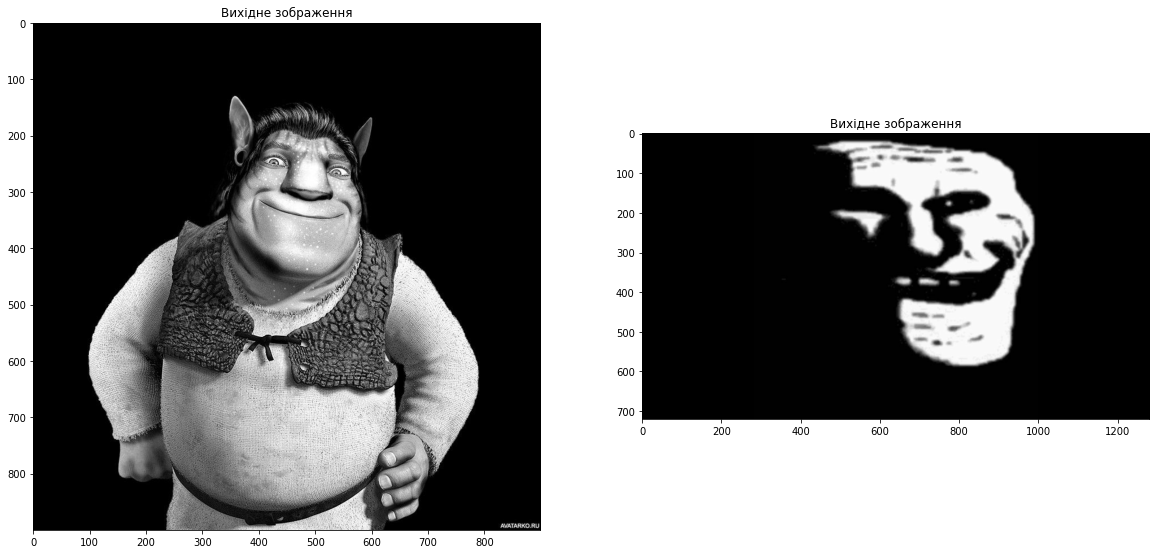

In [14]:
print(img_ref.shape)
print(img.shape)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray'); plt.title('Вихідне зображення')
plt.subplot(122),plt.imshow(img, cmap = 'gray'); plt.title('Вихідне зображення')
plt.show()

### Синтаксис функції
    scipy.ndimage.gaussian_filter(input, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
Параметри:
* **input** - вхідне зображення (масив);
* **sigma** - Стандартне відхилення для ядра Гаусса. Стандартні відхилення фільтра Гаусса задаються для кожної осі як послідовність, або як єдине число, у цьому випадку вона дорівнює для всіх осей.

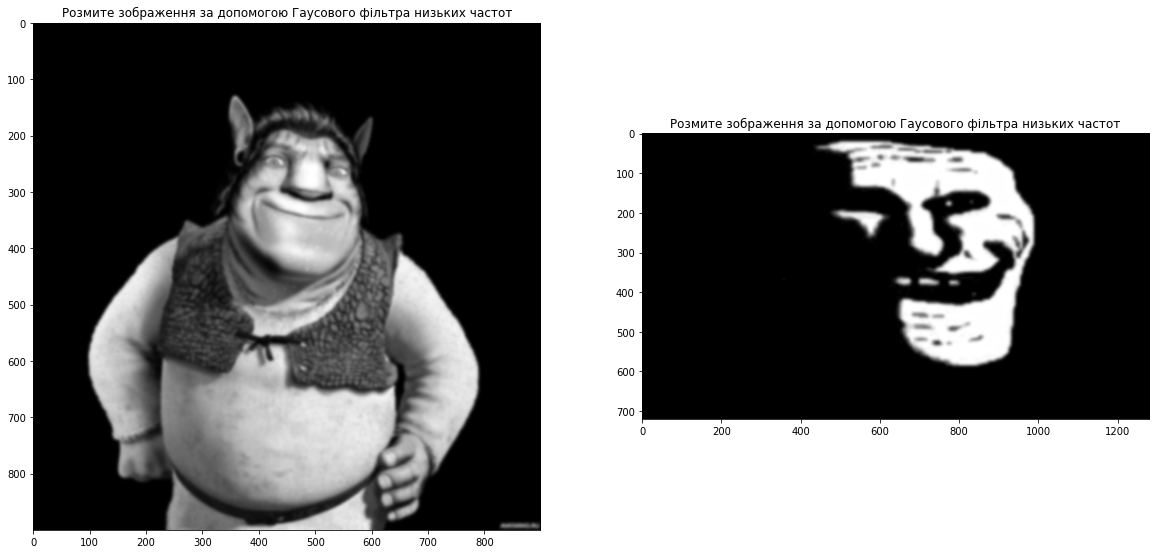

In [15]:
plt.figure(figsize=(20,20))
im_blurred_ref = gaussian_filter(img_ref, sigma=2.5)
im_blurred = gaussian_filter(img, sigma=2.5)
plt.subplot(121),plt.imshow(im_blurred_ref, cmap = 'gray'); plt.title('Розмите зображення за допомогою Гаусового фільтра низьких частот')
plt.subplot(122),plt.imshow(im_blurred, cmap = 'gray'); plt.title('Розмите зображення за допомогою Гаусового фільтра низьких частот')
plt.show()

### Створення нового зображення в 16 разів менше за вихідне

In [16]:
n = 4 
w_ref, h_ref = img_ref.shape[0] // n, img_ref.shape[1] // n
im_small_ref = np.zeros((w_ref,h_ref))
for i in range(w_ref):
   for j in range(h_ref):
      im_small_ref[i,j] = img_ref[n*i, n*j]
        
w, h = img.shape[0] // n, img.shape[1] // n
im_small = np.zeros((w,h))
for i in range(w):
   for j in range(h):
      im_small[i,j] = img[n*i, n*j]

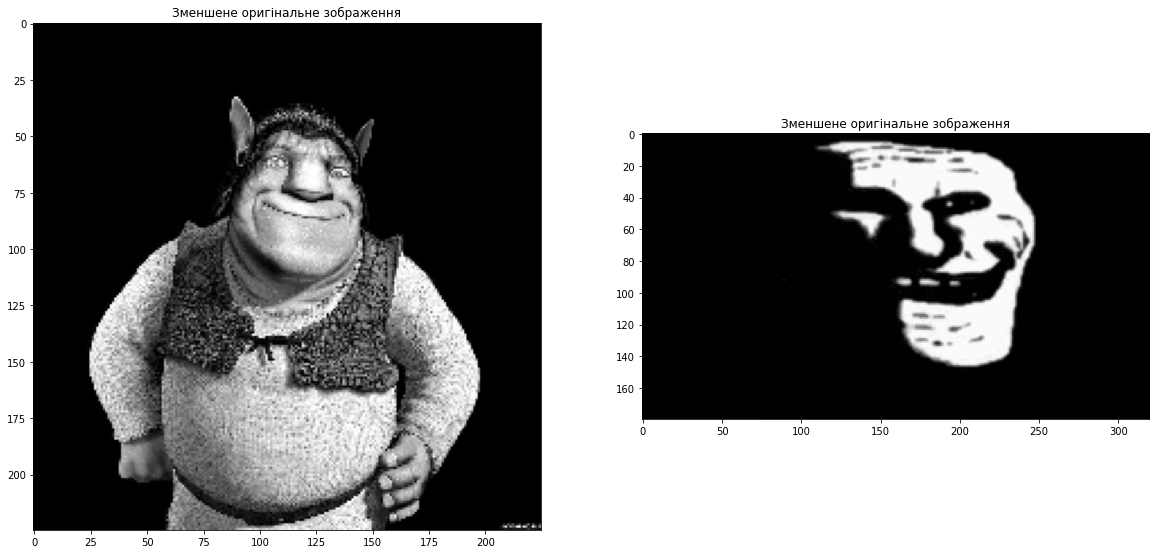

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(im_small_ref, cmap = 'gray'); plt.title('Зменшене оригінальне зображення')
plt.subplot(122),plt.imshow(im_small, cmap = 'gray'); plt.title('Зменшене оригінальне зображення')

plt.show()

### Створення нового зображення в 16 разів менше за розмите зображення

In [18]:
im_small_ref = np.zeros((w_ref,h_ref))
for i in range(w_ref):
   for j in range(h_ref):
      im_small_ref[i,j] = im_blurred_ref[n*i, n*j]
        
im_small = np.zeros((w,h))
for i in range(w):
   for j in range(h):
      im_small[i,j] = im_blurred[n*i, n*j]

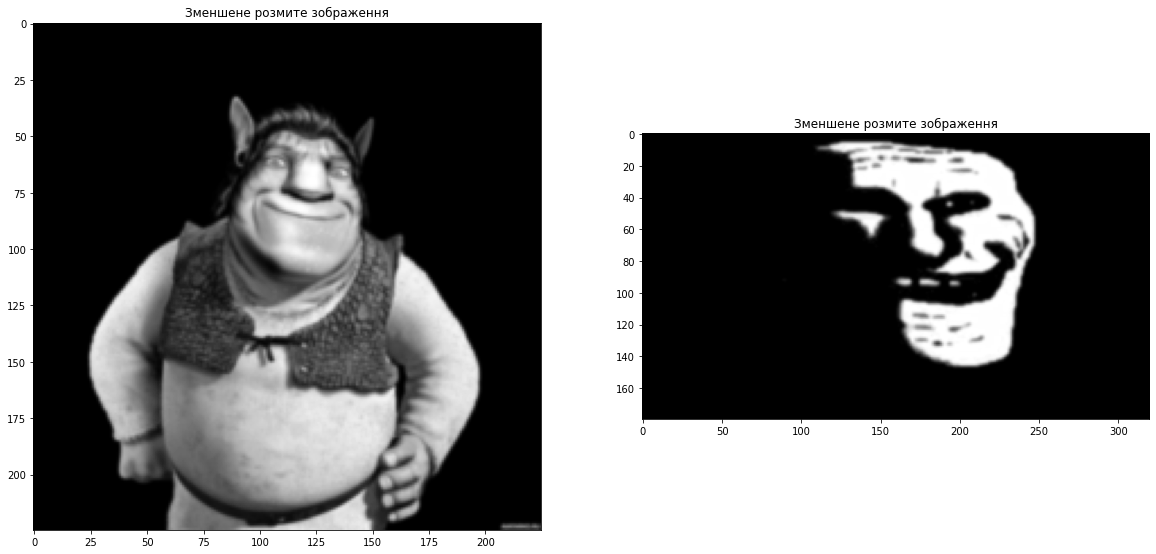

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(im_small_ref, cmap = 'gray'); plt.title('Зменшене розмите зображення')
plt.subplot(122),plt.imshow(im_small, cmap = 'gray'); plt.title('Зменшене розмите зображення')
plt.show()

### Фільтр Гауса в частотній області

1. Використаємо вхідне зображення та ШПФ для створення 2D-масиву частот.
2. Створюємо невелике гауссове 2D-ядро (яке буде використовуватися як фільтр низької частоти) у просторовій області та накладемо його, щоб збільшити до розмірів зображення.
3. Використаємо ШПФ для отримання ядра Гаусса в частотній області.
4. Використаємо теорему згортки, щоб перетворити фільтр низьких частот на вхідне зображення в частотній області.
5. Використаємо зворотнє перетворення Фур'є для отримання вихідного зображення.

In [20]:
kernel_ref = np.outer(signal.gaussian(img_ref.shape[0], 5), signal.gaussian(img_ref.shape[1], 5))
freq_ref = fp.fft2(img_ref)
assert(freq_ref.shape == kernel_ref.shape)
freq_kernel_ref = fp.fft2(fp.ifftshift(kernel_ref))
convolved_ref = freq_ref*freq_kernel_ref # by the Convolution theorem
im_blur_ref = fp.ifft2(convolved_ref).real
im_blur_ref = 255 * im_blur_ref / np.max(im_blur_ref)

kernel = np.outer(signal.gaussian(img.shape[0], 5), signal.gaussian(img.shape[1], 5))
freq = fp.fft2(img)
assert(freq.shape == kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved = freq*freq_kernel # by the Convolution theorem
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur)

### Вихідне та розмите зображення

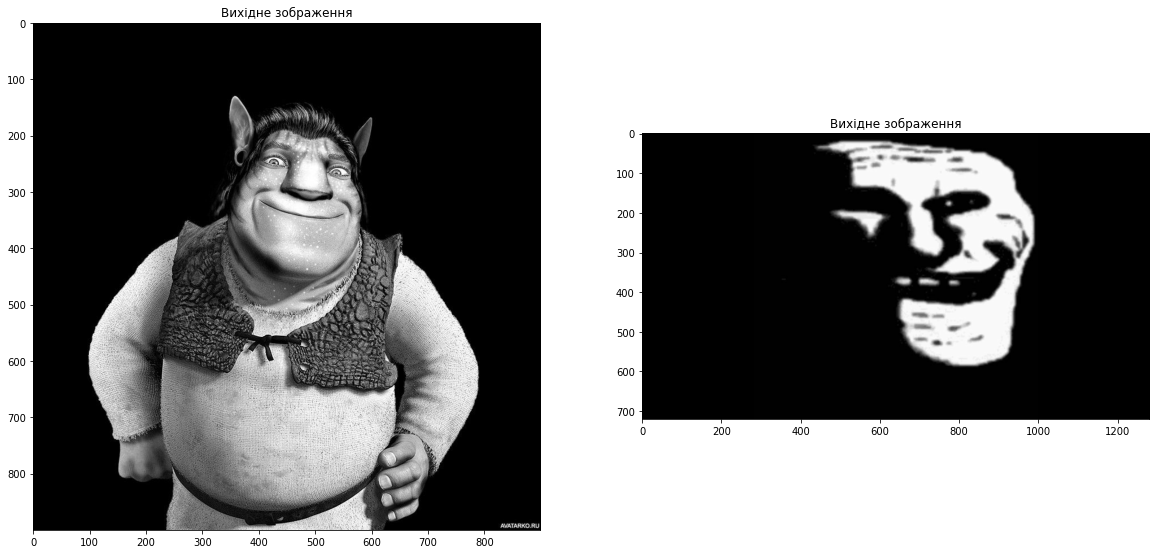

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img_ref, cmap = 'gray'); plt.title('Вихідне зображення')
plt.subplot(122),plt.imshow(img, cmap = 'gray'); plt.title('Вихідне зображення')
plt.show()

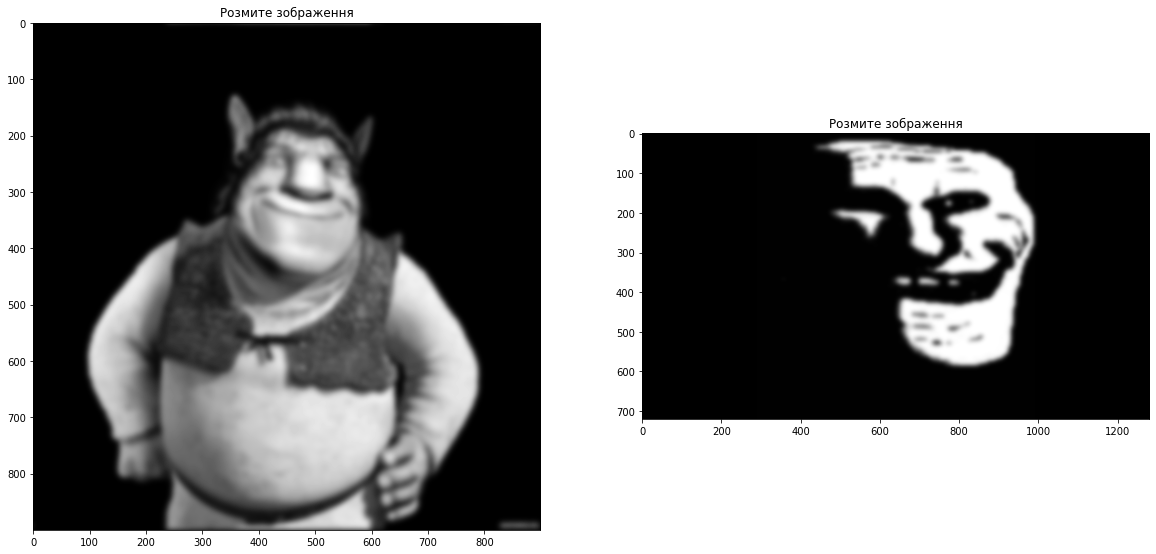

In [22]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(im_blur_ref, cmap = 'gray'); plt.title('Розмите зображення')
plt.subplot(122),plt.imshow(im_blur, cmap = 'gray'); plt.title('Розмите зображення')

plt.show()

### Підвищення роздільної здатності зображення за допомогою перетворення Фур'є

1. Використаємо зображення у відтінках сірого.
2. Створимо зображення в 2 рази більше за вихідне та заповнимо його вихідним зображенням.
3. Використаємо ШПФ з фільтром низьких частот.
4. Виконаємо зворотнє перетворення Фур'є для отримання зображення.

In [23]:
im1_ref = np.zeros((2*img_ref.shape[0], 2*img_ref.shape[1]))
im1 = np.zeros((2*img.shape[0], 2*img.shape[1]))
print(img_ref.shape, im1_ref.shape)
print(img.shape, im1.shape)

(900, 900) (1800, 1800)
(720, 1280) (1440, 2560)


In [24]:
for i in range(img_ref.shape[0]):
    for j in range(img_ref.shape[1]):
        im1_ref[2*i,2*j] = img_ref[i,j]
        
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        im1[2*i,2*j] = img[i,j]

### Ядро фільтру низьких частот

In [25]:
kernel = [[0.25, 0.5, 0.25], [0.5, 1, 0.5], [0.25, 0.5, 0.25]]

### Збільшимо ядро до форми зображення

In [26]:
kernel_ref = np.pad(kernel, (((im1_ref.shape[0]-3)//2,(im1_ref.shape[0]-3)//2+1), ((im1_ref.shape[1]-3)//2,(im1_ref.shape[1]-3)//2+1)), padwithzeros)
kernel = np.pad(kernel, (((im1.shape[0]-3)//2,(im1.shape[0]-3)//2+1), ((im1.shape[1]-3)//2,(im1.shape[1]-3)//2+1)), padwithzeros)

In [27]:
freq_ref = fp.fft2(im1_ref)
freq_kernel_ref = fp.fft2(fp.ifftshift(kernel_ref))
freq_LPF_ref = freq_ref*freq_kernel_ref # by the Convolution theorem
im2_ref = fp.ifft2(freq_LPF_ref)
freq_im2_ref = fp.fft2(im2_ref)

freq = fp.fft2(im1)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
freq_LPF = freq*freq_kernel # by the Convolution theorem
im2 = fp.ifft2(freq_LPF)
freq_im2 = fp.fft2(im2)

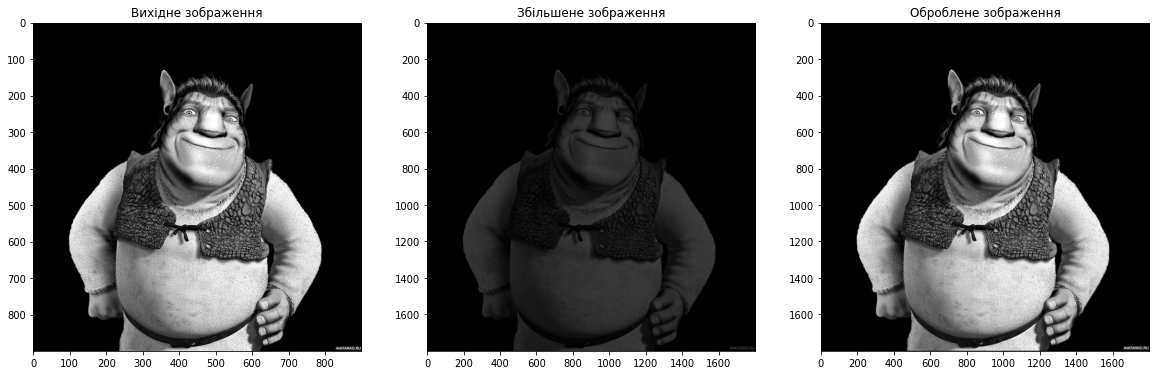

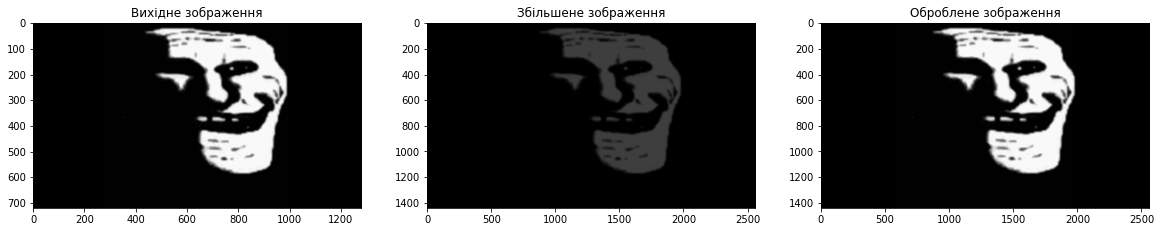

In [28]:
plt.figure(figsize=(20,20))
plt.gray()
plt.subplot(1,3,1)
plt.imshow(img_ref)
plt.title('Вихідне зображення')
plt.subplot(1,3,2)
plt.imshow(im1_ref)
plt.title('Збільшене зображення')
plt.subplot(1,3,3)
plt.imshow(im2_ref.real) # the imaginary part is an artifact
plt.title('Оброблене зображення')

plt.figure(figsize=(20,20))
plt.gray()
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Вихідне зображення')
plt.subplot(1,3,2)
plt.imshow(im1)
plt.title('Збільшене зображення')
plt.subplot(1,3,3)
plt.imshow(im2.real) # the imaginary part is an artifact
plt.title('Оброблене зображення')
plt.show()

## Відновлення розмитих зображень

1. Створимо ядро розмиття руху заданої форми.

### Створимо фільтр розмиття руху

In [29]:
size = 21
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :] = np.ones(size)
kernel = kernel / size
kernel_ref = np.pad(kernel, (((img_ref.shape[0]-size)//2,(img_ref.shape[0]-size)//2+1), ((img_ref.shape[1]-size)//2,(img_ref.shape[1]-size)//2+1)), padwithzeros)
kernel = np.pad(kernel, (((img.shape[0]-size)//2,(img.shape[0]-size)//2+1), ((img.shape[1]-size)//2,(img.shape[1]-size)//2+1)), padwithzeros)

2. Накладемо ядро на зображення в частотній формі.
3. Отримаємо розмите зображення у просторовій області за допомогою зворотнього перетворення Фур'є.

In [30]:
freq_ref = fp.fft2(img_ref)
freq_kernel_ref = fp.fft2(fp.ifftshift(kernel_ref))
convolved1_ref = freq_ref*freq_kernel_ref
im_blur_ref = fp.ifft2(convolved1_ref).real
im_blur_ref = im_blur_ref / np.max(im_blur_ref)

freq = fp.fft2(img)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved1 = freq*freq_kernel
im_blur = fp.ifft2(convolved1).real
im_blur = im_blur / np.max(im_blur)

In [31]:
epsilon = 10**-6

4. Обчислимо обернене ядро фільтра і накладемо на розмите зображення у частотній області.

In [32]:
freq_ref = fp.fft2(im_blur_ref)
freq_kernel_ref = 1 / (epsilon + freq_kernel_ref)

freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel)

5. Повернемо згорнуте зображення назад у просторову область.

In [33]:
convolved_ref = freq_ref*freq_kernel_ref
im_restored_ref = fp.ifft2(convolved_ref).real
im_restored_ref = im_restored_ref / np.max(im_restored_ref)

convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = im_restored / np.max(im_restored)

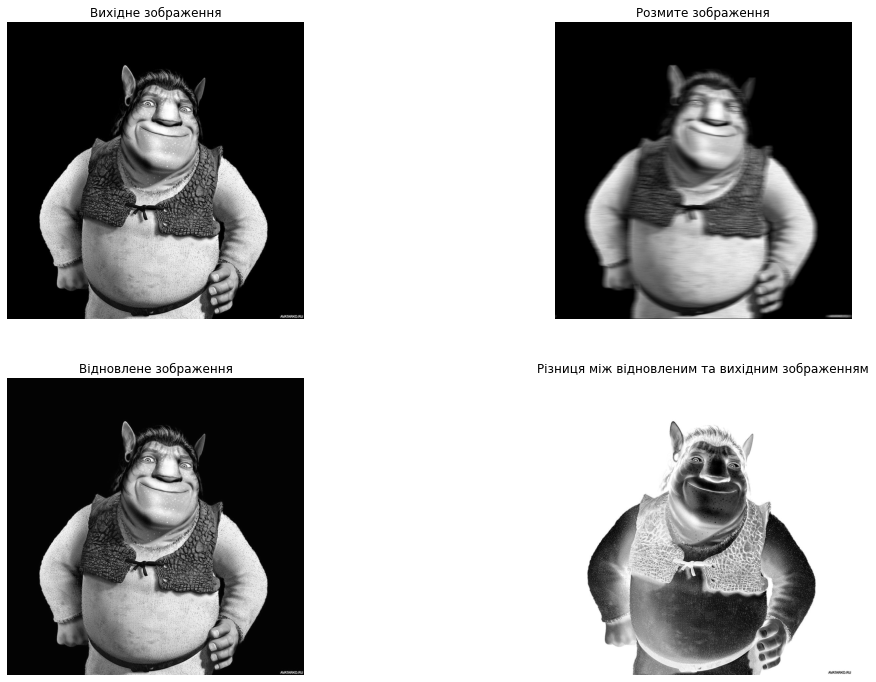

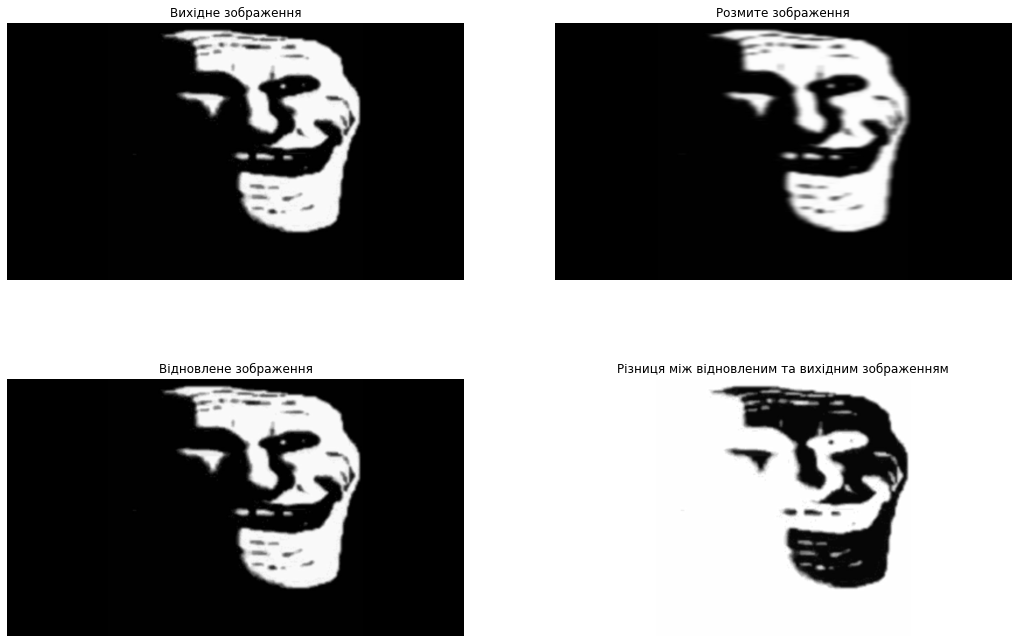

In [34]:
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.imshow(img_ref)
plt.title('Вихідне зображення')
plt.axis('off')
plt.subplot(222)
plt.imshow(im_blur_ref)
plt.title('Розмите зображення')
plt.axis('off')
plt.subplot(223)
plt.imshow(im_restored_ref)
plt.title('Відновлене зображення')
plt.axis('off')
plt.subplot(224)
plt.imshow(im_restored_ref - img_ref)
plt.title('Різниця між відновленим та вихідним зображенням')
plt.axis('off')

plt.figure(figsize=(18,12))
plt.subplot(221)
plt.imshow(img)
plt.title('Вихідне зображення')
plt.axis('off')
plt.subplot(222)
plt.imshow(im_blur)
plt.title('Розмите зображення')
plt.axis('off')
plt.subplot(223)
plt.imshow(im_restored)
plt.title('Відновлене зображення')
plt.axis('off')
plt.subplot(224)
plt.imshow(im_restored - img)
plt.title('Різниця між відновленим та вихідним зображенням')
plt.axis('off')
plt.show()